# Analyse avancée des Musées de France  
Cartographie interactive, typologies et enrichissement visuel

Ce notebook propose une exploration approfondie des musées de France à partir de données publiques.  
Nous allons combiner analyse statistique, visualisation géographique interactive et enrichissement visuel via l’API Wikimedia Commons.

Objectifs :
- comprendre la répartition territoriale des musées  
- analyser les typologies et caractéristiques institutionnelles  
- créer une carte interactive avec clusters  
- enrichir les données avec images et liens utiles  
- produire une table finale exploitable pour un portfolio ou un tableau de bord  

---

## 1. Importation des bibliothèques


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import requests

sns.set(style="whitegrid", palette="deep")


## 2. Chargement du dataset

Le fichier `musees-de-france.csv` doit être importé dans l’environnement Colab.


In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("musees-de-france.csv", sep=";")
df.head()


Saving musees-de-france.csv to musees-de-france.csv


,Identifiant Muséofile,Région administrative,Département,Commune,Nom officiel du musée,Date arrêté attribution appellation,Adresse,Lieu,Code Postal,Téléphone,URL,Latitude,Longitude,REF_Deps,geolocalisation
0,M0963,Auvergne-Rhône-Alpes,Ain,Bourg-en-Bresse,musée de Brou,2003-02-01,63 boulevard de Brou,Monastère royal de Brou,1000.0,04 74 22 83 83,www.monastere-de-brou.fr/#,46.196549,5.236521,0105301,"46.196549, 5.236521"
1,M0964,Auvergne-Rhône-Alpes,Ain,Bourg-en-Bresse,musées des pays de l'Ain,2003-02-01,"34, rue Général Delestraint",NaN,1000.0,04 74 32 10 60,www.ain.fr/solutions-services-infos-pratiques/...,46.196543,5.219217,0105302,"46.196543, 5.219217"
2,M0971,Auvergne-Rhône-Alpes,Ain,Pont-de-Vaux,musée Chintreuil,2003-02-01,66 rue Maréchal de Lattre-de-Tassigny,NaN,1190.0,03 85 51 45 75,www.musee-chintreuil.com/,46.430076,4.938125,0130501,"46.430076, 4.938125"
3,M0973,Auvergne-Rhône-Alpes,Ain,Saint-Paul-de-Varax,musée Louis Jourdan,2003-02-01,place Louis-Jourdan,NaN,1370.0,04 74 50 50 13,www.mairie-saintpauldevarax.fr/fr/information/...,46.098973,5.129264,0138301,"46.098973, 5.129264"
4,M0104,Auvergne-Rhône-Alpes,Allier,Montluçon,musée des musiques populaires (vieux château),2003-02-01,3 rue Notre Dame,NaN,3100.0,04 70 02 19 60,www.mupop.fr/,46.341009,2.605724,0318501,"46.341009, 2.605724"


## 3. Aperçu général du dataset


In [3]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Identifiant Muséofile                1217 non-null   object 
 1   Région administrative                1217 non-null   object 
 2   Département                          1217 non-null   object 
 3   Commune                              1217 non-null   object 
 4   Nom officiel du musée                1217 non-null   object 
 5   Date arrêté attribution appellation  1217 non-null   object 
 6   Adresse                              1154 non-null   object 
 7   Lieu                                 517 non-null    object 
 8   Code Postal                          1216 non-null   float64
 9   Téléphone                            1192 non-null   object 
 10  URL                                  1132 non-null   object 
 11  Latitude                      

,Identifiant Muséofile,Région administrative,Département,Commune,Nom officiel du musée,Date arrêté attribution appellation,Adresse,Lieu,Code Postal,Téléphone,URL,Latitude,Longitude,REF_Deps,geolocalisation
count,1217,1217,1217,1217,1217,1217,1154,517,1216.000000,1192,1132,1217.000000,1217.000000,1198,1217
unique,1214,14,103,845,994,67,1097,455,NaN,1157,1094,NaN,NaN,1194,1196
top,M7042,Auvergne-Rhône-Alpes,Paris,Paris,musée municipal,2003-02-01,Place de l'Hôtel de Ville,Château,NaN,03 22 97 14 00,www.ville-saintes.fr/decouvrir-sortir/culture/...,NaN,NaN,6938603,"48.581229, 7.751984"
freq,3,137,50,50,61,987,6,14,NaN,3,4,NaN,NaN,3,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49969.023849,NaN,NaN,45.999851,2.391471,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27349.043060,NaN,NaN,6.478647,8.517035,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,-21.267650,-61.646677,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26510.000000,NaN,NaN,44.555515,1.006479,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52200.000000,NaN,NaN,47.073893,2.734399,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75003.000000,NaN,NaN,48.817037,5.034107,NaN,NaN


## 4. Nettoyage et préparation


In [4]:
df = df.drop_duplicates()

df["Région administrative"] = df["Région administrative"].str.strip().str.title()
df["Département"] = df["Département"].astype(str)

df.isna().sum()


,0
Identifiant Muséofile,0
Région administrative,0
Département,0
Commune,0
Nom officiel du musée,0
Date arrêté attribution appellation,0
Adresse,63
Lieu,700
Code Postal,1
Téléphone,25


## 5. Répartition des musées par région


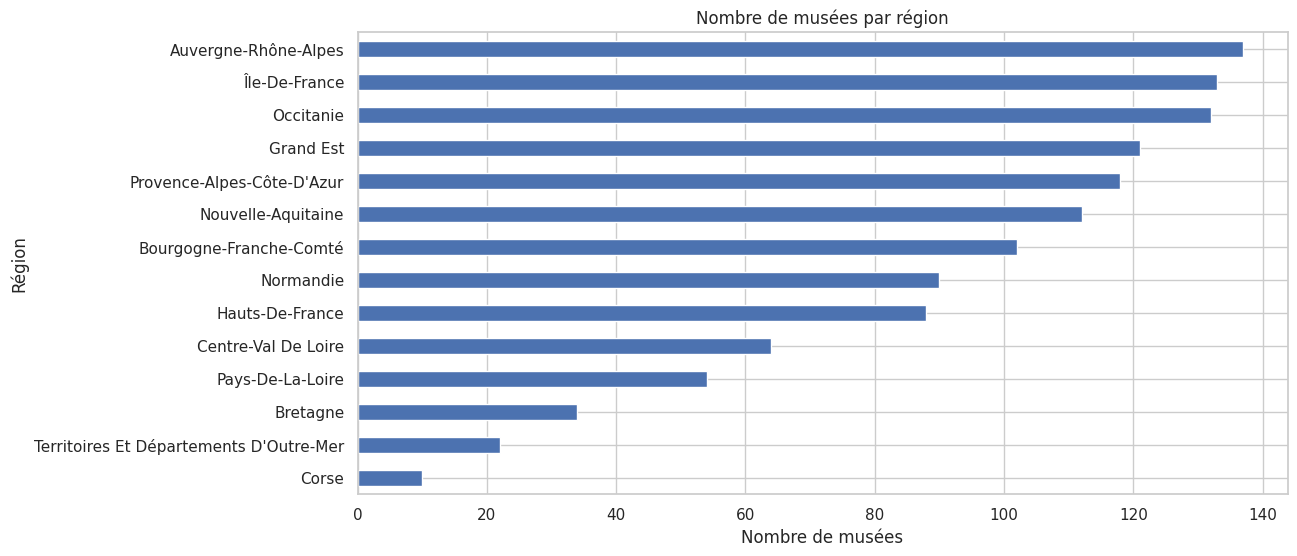

In [5]:
plt.figure(figsize=(12,6))
df["Région administrative"].value_counts().sort_values().plot(kind="barh")
plt.title("Nombre de musées par région")
plt.xlabel("Nombre de musées")
plt.ylabel("Région")
plt.show()


## 6. Classification thématique automatique (basée sur le nom du musée)


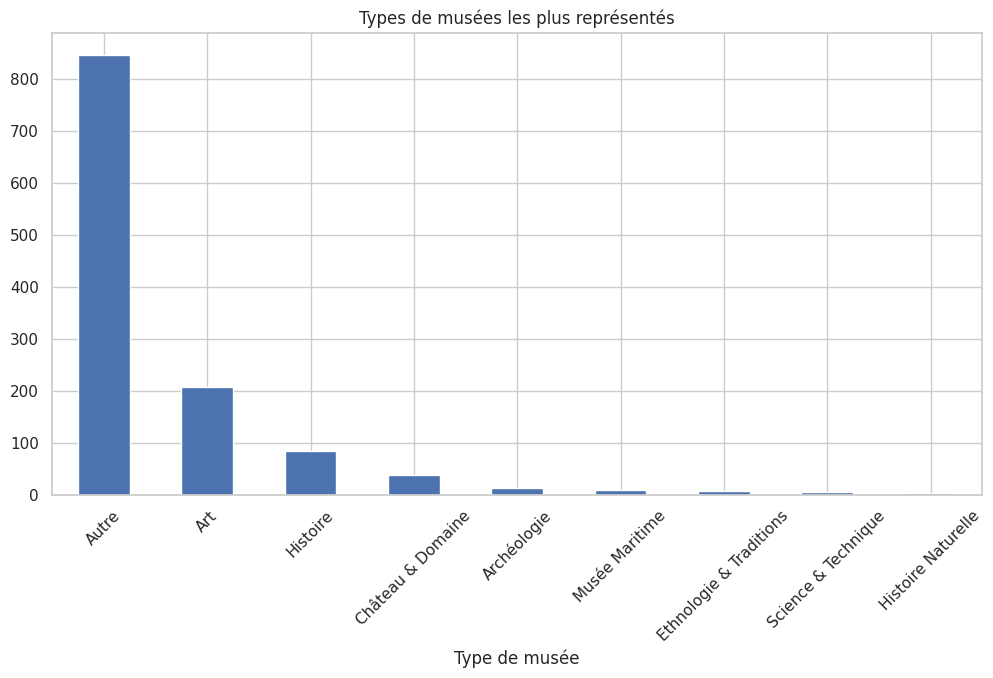

In [6]:
def extract_museum_type(name):
    name = str(name).lower()
    if 'art' in name or 'beaux-arts' in name:
        return 'Art'
    elif 'histoire' in name or 'guerre' in name:
        return 'Histoire'
    elif 'science' in name or 'technique' in name:
        return 'Science & Technique'
    elif 'archéologie' in name:
        return 'Archéologie'
    elif 'ethno' in name or 'tradition' in name:
        return 'Ethnologie & Traditions'
    elif 'nature' in name or 'environnement' in name:
        return 'Histoire Naturelle'
    elif 'pêche' in name or 'mer' in name:
        return 'Musée Maritime'
    elif 'château' in name:
        return 'Château & Domaine'
    else:
        return 'Autre'

df["Type de musée"] = df["Nom officiel du musée"].apply(extract_museum_type)

plt.figure(figsize=(12,6))
df["Type de musée"].value_counts().plot(kind="bar")
plt.title("Types de musées les plus représentés")
plt.xticks(rotation=45)
plt.show()


## 7. Répartition par département


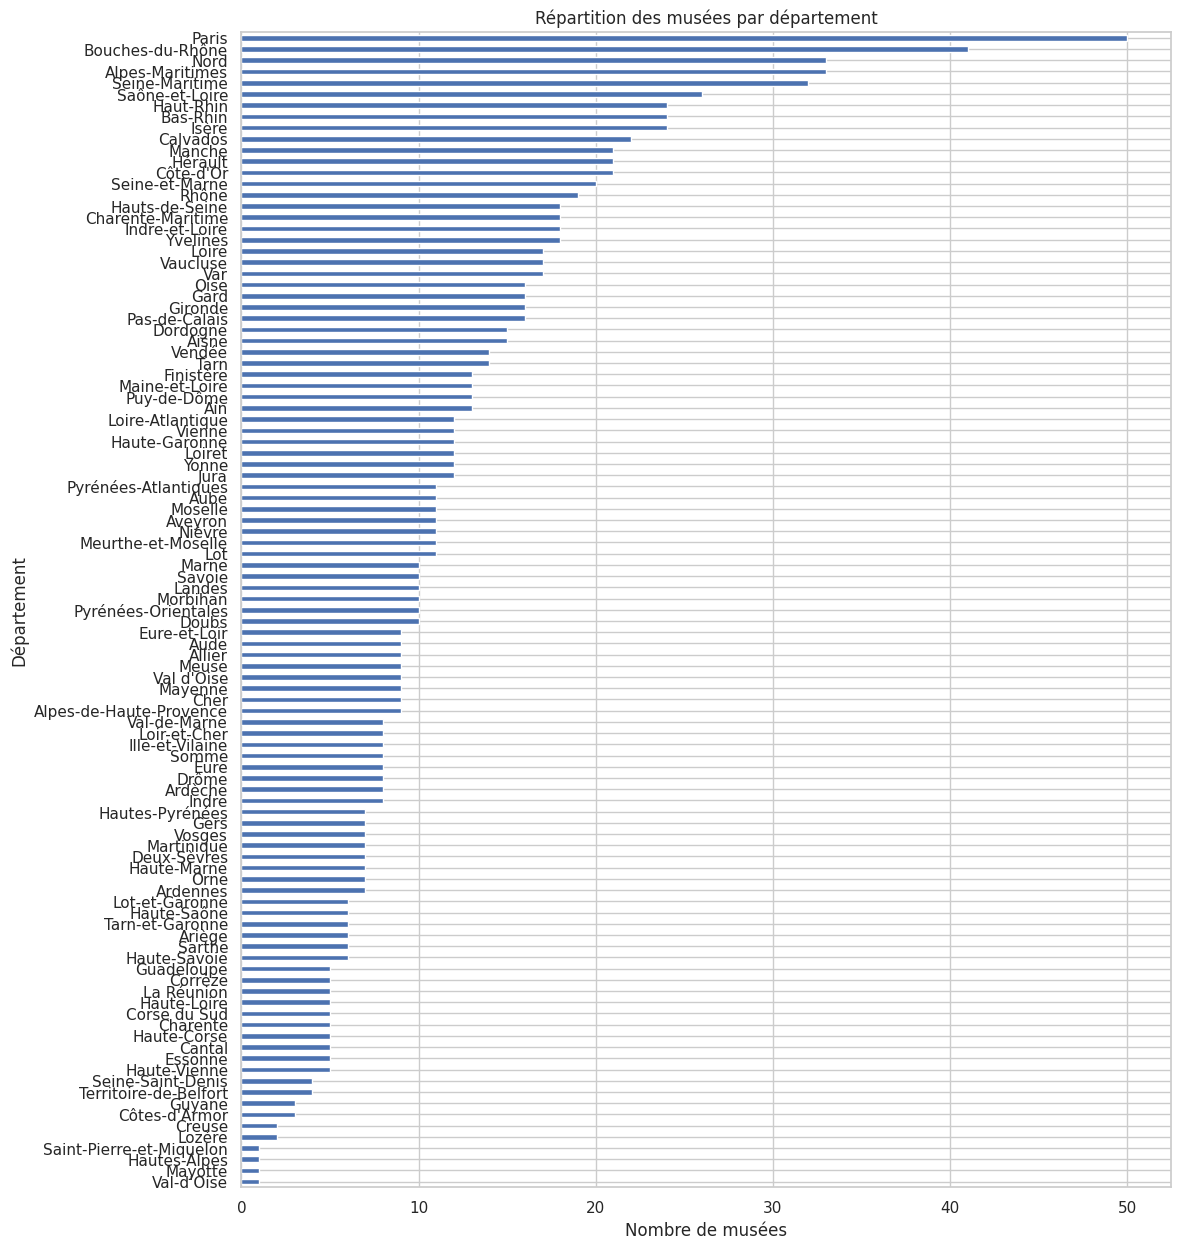

In [7]:
plt.figure(figsize=(12,15))
df["Département"].value_counts().sort_values().plot(kind="barh")
plt.title("Répartition des musées par département")
plt.xlabel("Nombre de musées")
plt.show()


# 8. Carte interactive avancée (Folium + clusters)

In [8]:
mean_lat = df["Latitude"].mean()
mean_lon = df["Longitude"].mean()

m = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)
cluster = MarkerCluster().add_to(m)

for _, row in df.iterrows():
    popup = f"""
    <b>{row['Nom officiel du musée']}</b><br>
    {row['Commune']} ({row['Département']})<br>
    <a href="{row['URL']}" target="_blank">Site officiel</a>
    """
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=popup,
        tooltip=row["Nom officiel du musée"]
    ).add_to(cluster)

m


# 9. Enrichissement visuel : récupération d’images via Wikimedia Commons

Nous allons interroger l’API Wikimedia Commons pour récupérer une image libre associée au nom du musée.


In [10]:
def get_commons_image(query):
    url = "https://commons.wikimedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "prop": "pageimages",
        "piprop": "thumbnail",
        "pithumbsize": 300,
        "generator": "search",
        "gsrsearch": query,
        "gsrlimit": 1
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        try:
            data = response.json()
            pages = data["query"]["pages"]
            page = next(iter(pages.values()))
            return page["thumbnail"]["source"]
        except (requests.exceptions.JSONDecodeError, KeyError, StopIteration) as e:
            # print(f"Error parsing JSON or extracting data for query '{query}': {e}") # For debugging
            # print(f"Raw response text: {response.text}") # For debugging
            return None
    else:
        # print(f"API request failed for query '{query}' with status code {response.status_code}") # For debugging
        # print(f"Raw response text: {response.text}") # For debugging
        return None

df["Image"] = df["Nom officiel du musée"].apply(get_commons_image)
df.head()

,Identifiant Muséofile,Région administrative,Département,Commune,Nom officiel du musée,Date arrêté attribution appellation,Adresse,Lieu,Code Postal,Téléphone,URL,Latitude,Longitude,REF_Deps,geolocalisation,Type de musée,Image
0,M0963,Auvergne-Rhône-Alpes,Ain,Bourg-en-Bresse,musée de Brou,2003-02-01,63 boulevard de Brou,Monastère royal de Brou,1000.0,04 74 22 83 83,www.monastere-de-brou.fr/#,46.196549,5.236521,0105301,"46.196549, 5.236521",Autre,None
1,M0964,Auvergne-Rhône-Alpes,Ain,Bourg-en-Bresse,musées des pays de l'Ain,2003-02-01,"34, rue Général Delestraint",NaN,1000.0,04 74 32 10 60,www.ain.fr/solutions-services-infos-pratiques/...,46.196543,5.219217,0105302,"46.196543, 5.219217",Autre,None
2,M0971,Auvergne-Rhône-Alpes,Ain,Pont-de-Vaux,musée Chintreuil,2003-02-01,66 rue Maréchal de Lattre-de-Tassigny,NaN,1190.0,03 85 51 45 75,www.musee-chintreuil.com/,46.430076,4.938125,0130501,"46.430076, 4.938125",Autre,None
3,M0973,Auvergne-Rhône-Alpes,Ain,Saint-Paul-de-Varax,musée Louis Jourdan,2003-02-01,place Louis-Jourdan,NaN,1370.0,04 74 50 50 13,www.mairie-saintpauldevarax.fr/fr/information/...,46.098973,5.129264,0138301,"46.098973, 5.129264",Autre,None
4,M0104,Auvergne-Rhône-Alpes,Allier,Montluçon,musée des musiques populaires (vieux château),2003-02-01,3 rue Notre Dame,NaN,3100.0,04 70 02 19 60,www.mupop.fr/,46.341009,2.605724,0318501,"46.341009, 2.605724",Château & Domaine,None


# 10. Tableau enrichi (nom, ville, contact, site, image)

In [11]:
table = df[[
    "Nom officiel du musée",
    "Commune",
    "Département",
    "Téléphone",
    "URL",
    "Image"
]]

table.head(10)


,Nom officiel du musée,Commune,Département,Téléphone,URL,Image
0,musée de Brou,Bourg-en-Bresse,Ain,04 74 22 83 83,www.monastere-de-brou.fr/#,None
1,musées des pays de l'Ain,Bourg-en-Bresse,Ain,04 74 32 10 60,www.ain.fr/solutions-services-infos-pratiques/...,None
2,musée Chintreuil,Pont-de-Vaux,Ain,03 85 51 45 75,www.musee-chintreuil.com/,None
3,musée Louis Jourdan,Saint-Paul-de-Varax,Ain,04 74 50 50 13,www.mairie-saintpauldevarax.fr/fr/information/...,None
4,musée des musiques populaires (vieux château),Montluçon,Allier,04 70 02 19 60,www.mupop.fr/,None
5,musée régional,Les Vans,Ardèche,04 75 37 24 48,www.les-vans.fr/vivre-ici/structures-culturell...,None
6,musée d'art et d'archéologie,Aurillac,Cantal,04 71 45 46 10,musees.aurillac.fr/,None
7,musée d'histoire et d'archéologie,Die,Drôme,04 75 22 40 05,www.museededie.org/,None
8,musée-château,Annecy,Haute-Savoie,04 50 33 87 30,musees.annecy.fr/,None
9,musée de Rumilly et de l'Albanais,Rumilly,Haute-Savoie,04 50 64 64 18,www.mairie-rumilly74.fr/vos-services-publics/c...,None


# 11. Affichage d’un tableau HTML avec images

In [12]:
from IPython.display import HTML

def make_html_table(df):
    html = "<table>"
    html += "<tr><th>Musée</th><th>Commune</th><th>Contact</th><th>Site</th><th>Image</th></tr>"
    for _, row in df.iterrows():
        img = f'<img src="{row["Image"]}" width="200">' if row["Image"] else "—"
        html += f"""
        <tr>
            <td>{row['Nom officiel du musée']}</td>
            <td>{row['Commune']} ({row['Département']})</td>
            <td>{row['Téléphone']}</td>
            <td><a href="{row['URL']}" target="_blank">Lien</a></td>
            <td>{img}</td>
        </tr>
        """
    html += "</table>"
    return HTML(html)

make_html_table(table.head(20))


Musée,Commune,Contact,Site,Image
musée de Brou,Bourg-en-Bresse (Ain),04 74 22 83 83,Lien,—
musées des pays de l'Ain,Bourg-en-Bresse (Ain),04 74 32 10 60,Lien,—
musée Chintreuil,Pont-de-Vaux (Ain),03 85 51 45 75,Lien,—
musée Louis Jourdan,Saint-Paul-de-Varax (Ain),04 74 50 50 13,Lien,—
musée des musiques populaires (vieux château),Montluçon (Allier),04 70 02 19 60,Lien,—
musée régional,Les Vans (Ardèche),04 75 37 24 48,Lien,—
musée d'art et d'archéologie,Aurillac (Cantal),04 71 45 46 10,Lien,—
musée d'histoire et d'archéologie,Die (Drôme),04 75 22 40 05,Lien,—
musée-château,Annecy (Haute-Savoie),04 50 33 87 30,Lien,—
musée de Rumilly et de l'Albanais,Rumilly (Haute-Savoie),04 50 64 64 18,Lien,—


# 12. Conclusion

Ce notebook avancé a permis de :

- analyser les musées de France selon plusieurs dimensions  
- produire des visualisations statistiques  
- créer une carte interactive avec clusters  
- enrichir les données avec images et liens  
- générer une table finale exploitable pour un portfolio  

Il constitue une base solide pour un tableau de bord culturel ou un projet de data storytelling.
